In [1]:
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
# Generate 2D data
n_base = 100
data1 = np.random.randn(n_base,2) + [5,5]
data2 = np.random.randn(n_base,2) + [3,2]
data3 = np.random.randn(n_base,2) + [1,5]
data = np.concatenate((data1,data2,data3))
data.shape   # verification
np.random.shuffle(data)
n_samples = data.shape[0]

<IPython.core.display.Javascript object>


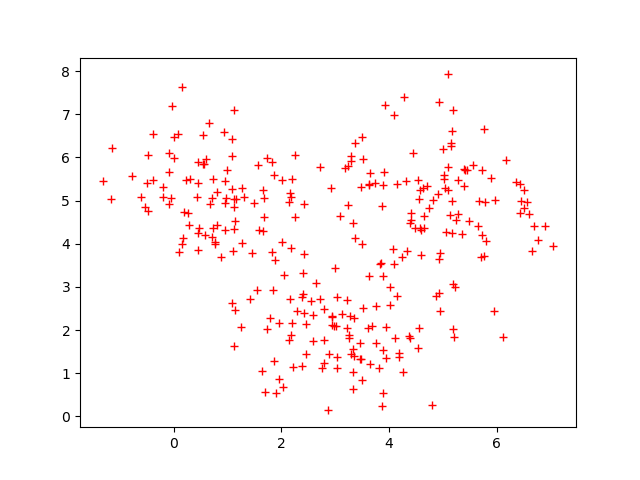

In [4]:
# Data visualisation
import matplotlib.pyplot as plt
%matplotlib notebook
plt.plot(data[:,0],data[:,1],'r+')
plt.show()

In [12]:
# Generate the matrix that indicates the missing data
missing_rate = 0.3
n_missing_samples = int(np.floor(n_samples * missing_rate))
n_missing_samples

missing_samples = \
    np.hstack( (np.zeros(n_samples - n_missing_samples, dtype=np.bool), \
               np.ones(n_missing_samples,dtype=np.bool)) )
np.random.shuffle(missing_samples)
missing_samples


array([False,  True, False, False, False, False, False, False, False,
        True, False,  True,  True, False, False, False, False, False,
        True,  True, False, False, False, False,  True, False, False,
        True, False, False, False, False,  True,  True,  True,  True,
       False,  True, False,  True, False, False,  True, False, False,
        True, False, False, False, False, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False,  True, False, False, False,  True, False,  True, False,
       False, False, False,  True,  True,  True,  True, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False,

In [13]:
# Generate the  data with missing data
# The generated missing data is MCAR
data_missing = data.copy()
data_missing[np.where(missing_samples), 1] = np.nan
data_missing

array([[ 3.03902251e+00,  1.13311754e+00],
       [ 6.43671977e+00,             nan],
       [ 3.50853767e+00,  2.51938758e+00],
       [ 5.72602939e+00,  5.70801844e+00],
       [ 4.27069268e-01,  5.07347973e+00],
       [ 6.57336996e+00,  4.97286011e+00],
       [ 4.23464483e+00,  3.68730215e+00],
       [ 3.94968111e+00,  2.06672430e+00],
       [ 1.12086196e+00,  4.34678522e+00],
       [ 4.25855398e+00,             nan],
       [ 2.46116133e+00,  1.44101733e+00],
       [-8.34317859e-02,             nan],
       [-8.83764057e-02,             nan],
       [ 2.18023009e-01,  5.48014888e+00],
       [ 4.71536356e+00,  5.33271492e+00],
       [ 1.67374249e+00,  5.06062377e+00],
       [ 1.09028016e+00,  2.62630003e+00],
       [ 5.93132536e-01,  5.96176532e+00],
       [ 1.45962076e+00,             nan],
       [ 4.08691996e+00,             nan],
       [ 4.93605964e+00,  2.85998220e+00],
       [ 6.69512403e+00,  4.40486582e+00],
       [-3.88811575e-01,  5.47288963e+00],
       [ 3.

In [14]:
# Imputation by using the mean:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
data_imputed = imp.fit_transform(data_missing)
data_imputed

array([[ 3.03902251e+00,  1.13311754e+00],
       [ 6.43671977e+00,  4.00453762e+00],
       [ 3.50853767e+00,  2.51938758e+00],
       [ 5.72602939e+00,  5.70801844e+00],
       [ 4.27069268e-01,  5.07347973e+00],
       [ 6.57336996e+00,  4.97286011e+00],
       [ 4.23464483e+00,  3.68730215e+00],
       [ 3.94968111e+00,  2.06672430e+00],
       [ 1.12086196e+00,  4.34678522e+00],
       [ 4.25855398e+00,  4.00453762e+00],
       [ 2.46116133e+00,  1.44101733e+00],
       [-8.34317859e-02,  4.00453762e+00],
       [-8.83764057e-02,  4.00453762e+00],
       [ 2.18023009e-01,  5.48014888e+00],
       [ 4.71536356e+00,  5.33271492e+00],
       [ 1.67374249e+00,  5.06062377e+00],
       [ 1.09028016e+00,  2.62630003e+00],
       [ 5.93132536e-01,  5.96176532e+00],
       [ 1.45962076e+00,  4.00453762e+00],
       [ 4.08691996e+00,  4.00453762e+00],
       [ 4.93605964e+00,  2.85998220e+00],
       [ 6.69512403e+00,  4.40486582e+00],
       [-3.88811575e-01,  5.47288963e+00],
       [ 3.

In [20]:
# Calculate the error of imputation:
from sklearn.metrics import mean_squared_error
mean_squared_error(data[missing_samples,1],data_imputed[missing_samples,1])

2.9002441261996745

In [21]:
# Get the means
imp.statistics_

array([2.99488391, 4.00453762])

In [22]:
# Imputation by using the median:
imp1 = SimpleImputer(missing_values=np.nan, strategy='median')
data_imputed1 = imp1.fit_transform(data_missing)
imp1.statistics_

array([3.19714339, 4.36091861])

In [23]:
mean_squared_error(data[missing_samples,1],data_imputed1[missing_samples,1])

2.8988032295292707

In [24]:
# Imputation by using zero:
imp2 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value = 0)
data_imputed2 = imp2.fit_transform(data_missing)
mean_squared_error(data[missing_samples,1],data_imputed2[missing_samples,1])
# We can see that the error is much more bigger

20.37989766020614

In [25]:
# Now we are going to do an imputation by center of group:

In [26]:
# Obtain a matrix only with complete observations:
data_filtered = data[~missing_samples, :]
data_filtered.shape 

(210, 2)

In [27]:
# Clustering the complete observations
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(data_filtered)
kmeans.cluster_centers_

array([[3.10131199, 1.98341882],
       [0.82274697, 5.21761718],
       [4.87957664, 5.08979387]])

In [28]:
# Determinate the nearest center for each imcomplete observation
from sklearn.neighbors.nearest_centroid import NearestCentroid
y = np.array([1, 2, 3])    # les étiquettes des groupes
ncPredictor = NearestCentroid()

In [29]:
# The centers calculated by using k-means are associated to 3 labels
# the "observations" for nearestCentroid are the centers resulting of k-means, only
# the coordinate of centers on the axis 1 are used
ncPredictor.fit(kmeans.cluster_centers_[:,0].reshape(-1, 1), y)

NearestCentroid(metric='euclidean', shrink_threshold=None)

In [30]:
# The index of nearest center is determinated by each incomplete observation by using
# the coordinate of the axis 1
whichClust = ncPredictor.predict(data_missing[missing_samples, 0].reshape(-1,1))

In [31]:
# Finding which values to be used for imputation of every observation (axis 2)
estimated = np.zeros(n_missing_samples)
indices = range(n_missing_samples)
for i in indices:
    estimated[i] = kmeans.cluster_centers_[whichClust[i]-1,1]

In [32]:
# Init of imputed data
data_imputed = data_missing.copy()

In [33]:
# Imputed with obtained values:
data_imputed[missing_samples, 1] = estimated

In [34]:
# Calculate the mean error of imputation
mean_squared_error(data[missing_samples,1],data_imputed[missing_samples,1])

3.483601388435762

In [35]:
# Now we are going to do an imputation by knn:

In [36]:
from fancyimpute import KNN
data_imputed = KNN(k=3).fit_transform(data_missing)
mean_squared_error(data[missing_samples,1],data_imputed[missing_samples,1])

Using Theano backend.


Imputing row 1/300 with 0 missing, elapsed time: 0.014
Imputing row 101/300 with 0 missing, elapsed time: 0.015
Imputing row 201/300 with 0 missing, elapsed time: 0.016


4.144518761558276

<IPython.core.display.Javascript object>


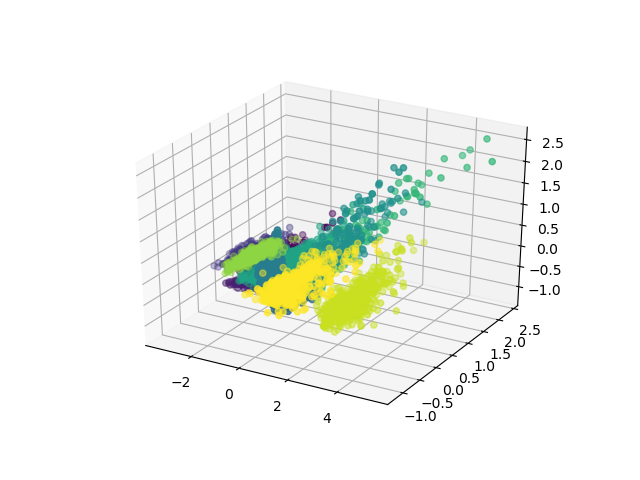

In [37]:
# Working with textures data
from sklearn.decomposition import PCA
textures = np.loadtxt('texture.dat')
pca = PCA().fit(textures[:,:40])
texturesp = pca.transform(textures[:,:40])
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig4 = plt.figure()
ax4 = fig4.add_subplot(111, projection='3d')
ax4.scatter(texturesp[:,0], texturesp[:,1], texturesp[:,2], c=textures[:, -1])
plt.show()

In [31]:
# Applying kmeans
kmeans = KMeans(n_clusters=11, n_init=1, init='k-means++').fit(texturesp[:,:2])
kmeans.cluster_centers_

array([[ 0.43772212, -0.85229229],
       [-2.2079835 ,  0.21781047],
       [ 0.56334362,  0.18379679],
       [ 3.00513576,  0.98458172],
       [-0.7995559 , -0.07324063],
       [ 1.32725701,  0.26231987],
       [-1.56788786,  0.25712271],
       [ 0.90487018, -0.35566749],
       [ 2.10179819,  0.45615953],
       [-0.20020274,  0.09313428],
       [ 0.18946048, -0.31280726]])

In [38]:
# We will generate missing data on projected data
# Generate the matrix that indicates the missing data
missing_rate = 0.25
n_samples = texturesp.shape[0]
n_missing_samples = int(np.floor(n_samples * missing_rate))
n_missing_samples

missing_samples = \
    np.hstack( (np.zeros(n_samples - n_missing_samples, dtype=np.bool), \
               np.ones(n_missing_samples,dtype=np.bool)) )
np.random.shuffle(missing_samples)
missing_samples

array([ True, False, False, ...,  True, False, False])

In [39]:
# texture data with incomplete observations
texturesp_missing = texturesp.copy()
texturesp_missing[np.where(missing_samples), 1] = np.nan
texturesp_missing

array([[-1.16155229e+00,             nan, -2.18123363e-01, ...,
        -1.78392923e-17, -6.19015065e-17, -2.87271905e-17],
       [-2.16050064e+00,  1.17288710e-01, -5.08043163e-01, ...,
         1.31462602e-16, -1.12168170e-16,  1.33752823e-16],
       [-2.70784962e-01,  1.16573323e-01, -1.50977202e-01, ...,
        -2.10700922e-17, -2.98673723e-17,  5.36882038e-19],
       ...,
       [ 1.06487356e+00,             nan, -5.67422091e-01, ...,
         1.39708741e-16,  3.03699976e-17,  7.81103219e-17],
       [ 1.42495239e-01,  1.03743672e-02, -8.26323787e-02, ...,
        -1.63735883e-17,  3.83964954e-18, -6.14427907e-17],
       [ 1.11138813e+00,  4.36353451e-01,  3.03466244e-01, ...,
        -5.55111512e-17,  8.32667268e-17, -1.38777878e-16]])

In [40]:
# Imputation by using the mean:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
texturesp_imputed = imp.fit_transform(texturesp_missing)
texturesp_imputed
# Calculate the mean error of imputation
mean_squared_error(texturesp[missing_samples,1],texturesp_imputed[missing_samples,1])

0.18234202051980197

In [41]:
# Imputation by using the median:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
texturesp_imputed = imp.fit_transform(texturesp_missing)
texturesp_imputed
# Calculate the mean error of imputation
mean_squared_error(texturesp[missing_samples,1],texturesp_imputed[missing_samples,1])

0.1853036132259715

In [42]:
# Now we are going to do an imputation by centers of groups:

In [43]:
# Obtain a matrix only with complete observations:
texturesp_filtered = texturesp[~missing_samples, :]
texturesp_filtered.shape 

(4125, 40)

In [44]:
# Clustering the complete observations
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=11).fit(texturesp_filtered)
kmeans.cluster_centers_

array([[-1.91783247e+00,  1.94449441e-01,  1.16458820e-02,
        -3.38508005e-01, -1.69811044e-01, -8.68056826e-02,
         8.91891241e-02, -8.83435373e-04, -8.27777717e-02,
        -2.15003526e-03,  2.39760029e-02,  8.05978612e-04,
         9.50679133e-03,  1.38115060e-02, -4.87799613e-04,
        -1.35598482e-02, -6.12676764e-03, -3.23689924e-03,
        -3.40872129e-04,  6.21391972e-03,  7.53745848e-04,
         5.32009622e-03, -6.29775023e-03,  1.49617875e-03,
         5.54877491e-04, -9.12621877e-05, -1.92949503e-03,
         3.23390406e-03,  4.33881182e-04, -1.95274040e-03,
         1.25134858e-03, -1.49719427e-03,  5.08727437e-04,
         7.78966901e-04, -3.05143152e-04, -6.11590244e-04,
         8.59942015e-04,  1.67131913e-17, -7.26755263e-17,
        -1.17733688e-16],
       [ 7.91941881e-01, -4.29437952e-01, -1.96072398e-01,
        -9.68562590e-02,  2.15677281e-01, -2.39792938e-02,
         3.49645497e-02,  7.85495387e-03,  7.01536989e-03,
        -7.25634951e-02, -5.98

In [45]:
# Determinate the nearest center for each imcomplete observation
from sklearn.neighbors.nearest_centroid import NearestCentroid
y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])    # les étiquettes des groupes
ncPredictor = NearestCentroid()
# The centers calculated by using k-means are associated to 3 labels
# the "observations" for nearestCentroid are the centers resulting of k-means, only
# the coordinate of centers on the axis 1 are used
ncPredictor.fit(kmeans.cluster_centers_[:,0].reshape(-1, 1), y)
# The index of nearest center is determinated by each incomplete observation by using
# the coordinate of the axis 1
whichClust = ncPredictor.predict(texturesp_missing[missing_samples, 0].reshape(-1,1))

In [46]:
# Finding which values to be used for imputation of every observation (axis 2)
n_missing_samples = int(np.floor(n_samples * missing_rate))
estimated = np.zeros(n_missing_samples)
indices = range(n_missing_samples)
for i in indices:
    estimated[i] = kmeans.cluster_centers_[whichClust[i]-1,1]

In [47]:
# Init of imputed data
texturesp_imputed = texturesp_missing.copy()
# Imputed with obtained values:
texturesp_imputed[missing_samples, 1] = estimated

In [48]:
# Calculate the mean error of imputation
mean_squared_error(texturesp[missing_samples,1],texturesp_imputed[missing_samples,1])

0.18120938798433947

In [49]:
# We can see that the best estimation with texture data is obtained by using 
# the imputation by center of group